# Iteration tools

## Aggregators

Aggregators are functions that iterate through an iterable and return a single value that (usually) takes into account every element of the iterable. <br>
min(iterable), max(iterable), sum(iterable)

Every object in Python has an associated <b>truth value</b>.<br>
Every object has a <b>True</b> value, except:
- None,
- False,
- 0 in any numeric type (e.g. 0, 0.0, 0+0j, ...),
- empty sequences (e.g. list, tuple, string, ...),
- empty mapping types (e.g. dictionary, set, ...),
- custom classes that implement a \_\_bool\_\_ or \_\_len\_\_ method that returns False or 0 <br>
which have <b>False</b> value.

any(iterable) -> returns True if any (one or more) element in iterable is truthy, False otherwise<br>
all(iterable) -> returns True if all the elements in iterable are truthy, False otherwise

Often, we are not particularly interested in the direct truth value of the elements in our iterables. We rather want to know, if any, or all, satisfy some condition.<br>
A function that takes a single argument and returns True or False is called a <b>predicate</b>.<br>
We can make any and all more useful by first applying a predicate to each element of the iterable using the map(fn, iterable) function or a comprehension.

In [7]:
def squares(n):
    for i in range(n):
        yield i ** 2

In [8]:
list(squares(5))

[0, 1, 4, 9, 16]

In [9]:
min(squares(5))

0

In [10]:
max(squares(5))

16

In [11]:
sum(squares(5))

30

In [12]:
sq = squares(5)

In [13]:
min(sq) # the generator is now exhausted

0

In [14]:
max(sq) # hence ValueError here

ValueError: max() arg is an empty sequence

In [17]:
bool(sq) # each object is truthy by default unless __bool__ or __len__ that returns False or 0 is implemented

True

In [18]:
class Person:
    pass

In [19]:
p = Person()

In [21]:
bool(p) # same here

True

In [23]:
class Person:
    def __bool__(self):
        return True

    def __len__(self):
        return 0

In [26]:
p = Person()
bool(p) # Python calls the __bool__ method first, if it's not implemented then __len__

True

In [27]:
any([0, '', None])

False

In [28]:
any([0, '', None, (10, 20)])

True

In [29]:
all([0, '', None, (10, 20)])

False

In [30]:
all([1, 'hello', (10,)])

True

Example 1: checking if each element of an iterable is a number.

In [33]:
from numbers import Number  # each numeric type is an instance of the Number class

print(isinstance(10, Number))
print(isinstance(10.5, Number))
print(isinstance(2+3j, Number))

True
True
True


In [43]:
s = {10, 20, 30, 40}
is_numeric = lambda x: isinstance(x, Number) # predicate

all(map(is_numeric, s))

True

In [44]:
s = {10, 20, 30, 40, '1'}
all(map(is_numeric, s))

False

In [45]:
list(map(is_numeric, s))

[False, True, True, True, True]

Example 2:
- check if every row (car brand) is at least 3 characters long,
- check if any row (car brand) has more than 10 character.

In [46]:
with open('data/car-brands.txt') as f:
    for row in f:
        print(len(row), row, end='')

11 Alfa Romeo
13 Aston Martin
5 Audi
8 Bentley
5 Benz
4 BMW
8 Bugatti
9 Cadillac
10 Chevrolet
9 Chrysler
8 Citroën
9 Corvette
4 DAF
6 Dacia
7 Daewoo
9 Daihatsu
7 Datsun
10 De Lorean
5 Dino
5 Dodge

In [50]:
with open('data/car-brands.txt') as f:
    result = all(map(lambda row: len(row.strip('\n')) >= 3, f))

result

True

In [52]:
with open('data/car-brands.txt') as f:
    result = any(map(lambda row: len(row) - 1 > 10, f))

result

True

## Slicing Iterables

We can also slice general iterables (including iterator of course) using <b>islice(iterable, start, stop, step)</b>. <br>
islice returns a <b>lazy iterator</b>.

In [1]:
import math

def factorials(n):
    for i in range(n):
        yield math.factorial(i)

In [2]:
facts = factorials(100)

In [3]:
facts[:2]

TypeError: 'generator' object is not subscriptable

In [4]:
from itertools import islice

In [5]:
help(islice)

Help on class islice in module itertools:

class islice(builtins.object)
 |  islice(iterable, stop) --> islice object
 |  islice(iterable, start, stop[, step]) --> islice object
 |  
 |  Return an iterator whose next() method returns selected values from an
 |  iterable.  If start is specified, will skip all preceding elements;
 |  otherwise, start defaults to zero.  Step defaults to one.  If
 |  specified as another value, step determines how many values are
 |  skipped between successive calls.  Works like a slice() on a list
 |  but returns an iterator.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  -------------------------------------------------------------

In [6]:
list(islice(factorials(100), 5))

[1, 1, 2, 6, 24]

In [8]:
list(islice(factorials(100), 3, 10, 2))

[6, 120, 5040, 362880]

In [9]:
def factorials():
    index = 0
    while True:
        print(f'yielding factorial({index})')
        yield math.factorial(index)
        index += 1

In [10]:
facts = factorials()
for _ in range(3):
    print(next(facts))

yielding factorial(0)
1
yielding factorial(1)
1
yielding factorial(2)
2


In [11]:
islice(factorials(), 3, 10) # the factorials function is not executed - islice returns a lazy iterator

sl = islice(factorials(), 3, 10)
list(sl)

In [16]:
list(sl) # it has been consumed 

[]

In [20]:
facts = factorials()

In [21]:
next(facts)
next(facts)

yielding factorial(0)
yielding factorial(1)


1

In [22]:
list(islice(facts, 0, 5)) # We use islice from 0 to 5, but since the generator has already advanced twice with next(), 
                          # it continues from factorial(2) to factorial(6)

yielding factorial(2)
yielding factorial(3)
yielding factorial(4)
yielding factorial(5)
yielding factorial(6)


[2, 6, 24, 120, 720]

## Selecting and Filtering

filter(predicate, iterable):
- returns all elements of iterable where predicate(element) is True,
- predicate can be None - in which case it is the <b>identity</b> function (truthy elements only will be retained),
- filter returns a lazy iterator. <br><br>

We can achieve the same result using generator expressions:<br>
(item for item in iterable if pred(item))

In [27]:
f = filter(lambda x: x < 4, [1, 10, 2, 10, 3, 10])
f # a lazy iterator

In [28]:
print(next(f))
print(next(f))
print(next(f))
print(next(f))

1
2
3


StopIteration: 

itertools.filterfalse:
- this works the same way as the filter function but instead of retaining elements where the predicate evaluates to True, it retains elements where the <b>predicate evaluates to False</b>,
- returns a lazy iterator.

In [29]:
from itertools import filterfalse

list(filterfalse(lambda x: x < 4, [1, 10, 2, 10, 3, 10]))

[10, 10, 10]

itertools.compress:
- it is a way of filtering one iterable, using the truthiness of items in another iterable,
- returns a lazy iterator.

In [31]:
data = ['a', 'b', 'c', 'd', 'e']
selectors = [True, False, 1, 0]  # 'e' gets associated with None as the length of data is bigger than the length of selectors

In [32]:
from itertools import compress

compress(data, selectors)

In [33]:
list(compress(data, selectors))

['a', 'c']

itertools.takewhile(pred, iterable):
- returns an iterator that will yield items while pred(item) is Truthy,
- at that point the iterator is exhausted even if there are more items in the iterable which predicate would be truthy,
- returns a lazy iterator.

In [35]:
from itertools import takewhile

takewhile(lambda x: x < 5, [1, 3, 5, 2, 1])

In [36]:
list(takewhile(lambda x: x < 5, [1, 3, 5, 2, 1]))

[1, 3]

itertools.dropwhile(pred, iterable):
- returns an iterator that will start iterating (and will yield all remaining elements) once pred(item) becomes Falsy,
- returns a lazy iterator.

In [37]:
from itertools import dropwhile

dropwhile(lambda x: x < 5, [1, 3, 5, 2, 1])

In [38]:
list(dropwhile(lambda x: x < 5, [1, 3, 5, 2, 1]))

[5, 2, 1]

## Infinite Iterators

iterools.count:
- an infinite iterator,
- similar to range (start, step)
- lazy iterator,
- different from range (no stop, start and step can be <b>any numeric type</b>).

In [40]:
import itertools

it = itertools.count(10, 2)
it

count(10, 2)

In [41]:
print(next(it))
print(next(it))
print(next(it))

10
12
14


In [44]:
it = itertools.count(10.5 + 0.5j, 0.5j)  # start and step can be any numeric type
it

count((10.5+0.5j), 0.5j)

In [45]:
print(next(it))
print(next(it))
print(next(it))

(10.5+0.5j)
(10.5+1j)
(10.5+1.5j)


itertools.cycle:
- lazy iterator,
- allows us to loop over a finite iterable <b>indefinitely</b>,
- if the argument of cycle is itself an iterator (iterators become exhausted) cycle <b>will still</b> produce an infinite sequence.

In [46]:
itertools.cycle(list('abc'))

In [47]:
it = itertools.cycle(list('abc'))
for _ in range(4):
    print(next(it))

a
b
c
a


In [48]:
def colours():
    yield 'red'
    yield 'green'
    yield 'blue'

In [49]:
cols = colours()

In [50]:
list(cols)

['red', 'green', 'blue']

In [51]:
list(cols) # the iterator became exhausted

[]

In [60]:
cols = colours()
g = itertools.cycle(cols)
g

In [61]:
list(itertools.islice(g, 10)) # Even though 'cols' is an iterator (which usually gets exhausted), itertools.cycle()
                              # internally caches the values and repeats them, so it still cycles indefinitely.

['red', 'green', 'blue', 'red', 'green', 'blue', 'red', 'green', 'blue', 'red']

itertools.repeat:
- lazy iterator,
- yields the same value indefinitely,
- optionally, we can specify a count to make the iterator finite,
- the items yielded by repeat are the <b>same</b> object.

In [62]:
g = itertools.repeat('Python')
for _ in range(5):
    print(next(g))

Python
Python
Python
Python
Python


In [63]:
g = itertools.repeat('Python', 4)
list(g)

['Python', 'Python', 'Python', 'Python']

In [66]:
g = itertools.repeat([], 4)
g_list = list(g)
g_list

[[], [], [], []]

In [67]:
g_list[0].append(0)

In [69]:
g_list # the items yielded by itertools.repeat are the same object

[[0], [0], [0], [0]]

## Chaining and Teeing

Chaining is analogous to sequence concatenation but not the same, we can do that with iterables (including iterators). Chaining is itself a lazy iterator. <br>
We can manually chain iterables this way: <br>

We can perform chaining using <b>itertools.chain(*args)</b>, which returns a lazy iterator. Each argument must be an iterable (we have variable number of positional arguments).

Unpacking is eager - not lazy!

We can also use itertools.chain.from_iterable(it) to chain iterables that are stored in iterable (e.g. list) it.<br>
It iterates lazily over each iterable in the iterable it.

In [1]:
l1 = (i ** 2 for i in range(4))
l2 = (i ** 2 for i in range(4, 8))
l3 = (i ** 2 for i in range(8, 12))

In [2]:
for gen in l1, l2, l3:
    for item in gen:
        print(item)

0
1
4
9
16
25
36
49
64
81
100
121


In [6]:
def chain_iterables(*iterables): # function for chaining iterables
    for iterable in iterables:
        yield from iterable

In [5]:
l1 = (i ** 2 for i in range(4))
l2 = (i ** 2 for i in range(4, 8))
l3 = (i ** 2 for i in range(8, 12))

for item in chain_iterables(l1, l2, l3):
    print(item)

0
1
4
9
16
25
36
49
64
81
100
121


In [7]:
from itertools import chain

l1 = (i ** 2 for i in range(4))
l2 = (i ** 2 for i in range(4, 8))
l3 = (i ** 2 for i in range(8, 12))

for item in chain(l1, l2, l3):
    print(item)

0
1
4
9
16
25
36
49
64
81
100
121


In [9]:
l1 = (i ** 2 for i in range(4))
l2 = (i ** 2 for i in range(4, 8))
l3 = (i ** 2 for i in range(8, 12))

list_ = [l1, l2, l3]
for item in chain(list_): # we are iterating over the generators themselves, not their contents
    print(item)

<generator object <genexpr> at 0x000001DA37325F20>
<generator object <genexpr> at 0x000001DA37325CB0>
<generator object <genexpr> at 0x000001DA37325FF0>


In [12]:
l1 = (i ** 2 for i in range(4))
l2 = (i ** 2 for i in range(4, 8))
l3 = (i ** 2 for i in range(8, 12))

list_ = [l1, l2, l3]
for item in chain(*list_): # unpacking is not lazy
    print(item)

0
1
4
9
16
25
36
49
64
81
100
121


In [14]:
l1 = (i ** 2 for i in range(4))
l2 = (i ** 2 for i in range(4, 8))
l3 = (i ** 2 for i in range(8, 12))

list_ = [l1, l2, l3]
c = chain.from_iterable(list_) # it's a lazy iterator
for item in c:
    print(item)

0
1
4
9
16
25
36
49
64
81
100
121


Sometimes we need to iterate through the same iterator multiple times, or even in parallel.<br>
To "copy" an iterator we can use <b>itertools.tee</b>:
- returns independent iterators in a tuple,
- the elements of the returned tuple are lazy iterators even if the original argument was not (e.g. a list).

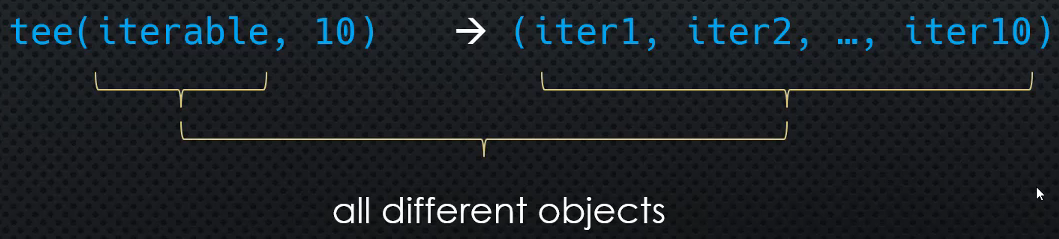

In [15]:
from itertools import tee

def squares(n):
    for i in range(n):
        yield i ** 2

In [17]:
gen = squares(10)
gen

<generator object squares at 0x000001DA36A585F0>

In [20]:
iters = tee(gen, 3)
iters # contains 3 different objects (copies of gen)

(<itertools._tee at 0x1da36a61540>,
 <itertools._tee at 0x1da3736b900>)

In [21]:
type(iters)

tuple

In [22]:
iter1, iter2, iter3 = iters

In [23]:
iter1 is iter2 is iter3

False

In [25]:
gen is iter1

False

In [26]:
next(iter1), next(iter1), next(iter1)# independent copies

(0, 1, 4)

In [27]:
next(iter2), next(iter2) # independent copies

(0, 1)

In [33]:
l = [1, 2, 3, 4]
lists = tee(l, 2)
lists # we get iterators even though we passed a list

(<itertools._tee at 0x1da36a430c0>, <itertools._tee at 0x1da312c5240>)

In [34]:
lists[0]

In [35]:
list(lists[0])

[1, 2, 3, 4]

In [36]:
list(lists[0])

[]

In [38]:
lists[0] is lists[0].__iter__() # an iterator

True

In [39]:
'__next__' in dir(lists[0])

True

## Mapping and Accumulation

Mapping -> applying a callable to each element of an iterable, for example map(fn, iterable)<br>
Accumulation -> reducing an iterable down to a single value, for example sum(iterable) and reduce(fn, iterable, \[initializer])

map(fn, iterable):
- applies fn to every element of iterable, and returns an iterator (lazy),
- fn must be a callable that requires a single argument,
- we can easily do the same thing using a generator expression,
- returns an iterator.

itertools.starmap:
- is very similar to map,
- unpacks every sub element of the iterable argument, and passes that to the map function,
- useful for mapping a multi-argument function on an iterable of iterables,
- returns an iterator.

In [5]:
l = [[1, 2], [3, 4]]
list(map(lambda item: item[0] * item[1], l)) # 2, 12

[2, 12]

In [4]:
import operator
from itertools import starmap

list(starmap(operator.mul, l))

[2, 12]

In [7]:
list(operator.mul(*item) for item in l)

[2, 12]

In [12]:
l = [(0, 0), [1, 1], range(2, 4)]
list(starmap(operator.add, l))

[0, 2, 5]

itertools.accumulate(iterable, fn, *, initial=None):
- returns a lazy iterator producing all the <b>intermediate results</b>, while reduce only returns the final result,
- is very similar to the reduce function,
- accepts an initializer,
- the argument order is not the same as in reduce.

In [8]:
import itertools

help(itertools.accumulate)

Help on class accumulate in module itertools:

class accumulate(builtins.object)
 |  accumulate(iterable, func=None, *, initial=None)
 |  
 |  Return series of accumulated sums (or other binary function results).
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [18]:
import functools

l = [1, 2, 3, 4]
functools.reduce(operator.mul, l)  # returns a number

24

In [10]:
itertools.accumulate(l, operator.mul)

In [11]:
for item in itertools.accumulate(l, operator.mul):
    print(item)

1
2
6
24


In [22]:
for item in itertools.accumulate(range(2, 6), operator.mul, initial=10):
    print(item)

10
20
60
240
1200


## Zipping

The zip function:
- takes a variable number of positional arguments - each of which is an iterable,
- returns a lazy iterator that produces tuples containing the elements of the iterables, iterated one at a time,
- it stops immediately once one of the iterables has been completely iterated over,
- zips based on the <b>shortest</b> iterable.

In [25]:
l1 = [1, 2, 3, 4, 5]
l2 = [1, 2, 3, 4]
l3 = [1, 2, 3]
results = zip(l1, l2, l3)
type(results)

zip

In [26]:
print(iter(results) is results)
print('__next__' in dir(results)) # it's an iterator

True
True


In [27]:
list(results)

[(1, 1, 1), (2, 2, 2), (3, 3, 3)]

In [29]:
list(results) # exhausted

[]

itertools.zip_longest(*args, \[fillvalue=None]):
- sometimes we want to zip, but based on the longest iterable,
- we can provide a default value for the "holes" -> fillvalue

In [24]:
help(itertools.zip_longest)

Help on class zip_longest in module itertools:

class zip_longest(builtins.object)
 |  zip_longest(iter1 [,iter2 [...]], [fillvalue=None]) --> zip_longest object
 |  
 |  Return a zip_longest object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the longest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.  When the shorter iterables
 |  are exhausted, the fillvalue is substituted in their place.  The fillvalue
 |  defaults to None or can be specified by a keyword argument.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  ------

In [1]:
def integer(n):
    for i in range(n):
        yield i

def squares(n):
    for i in range(n):
        yield i ** 2

def cubes(n):
    for i in range(n):
        yield i ** 3

In [2]:
iter1 = integer(6)
iter2 = squares(5)
iter3 = cubes(4)

In [3]:
list(zip(iter1, iter2, iter3))

[(0, 0, 0), (1, 1, 1), (2, 4, 8), (3, 9, 27)]

In [4]:
iter1 = integer(6)
iter2 = squares(5)
iter3 = cubes(4)

In [6]:
import itertools
list(itertools.zip_longest(iter1, iter2, iter3, fillvalue=''))

[(0, 0, 0), (1, 1, 1), (2, 4, 8), (3, 9, 27), (4, 16, ''), (5, '', '')]

## Grouping

Sometimes we want to loop over an iterable of elements but we want to group those elements as we iterate through them. <br>
Suppose we have an iterable containing tuples, and we want to group based on the first element of each tuple.<br><br>
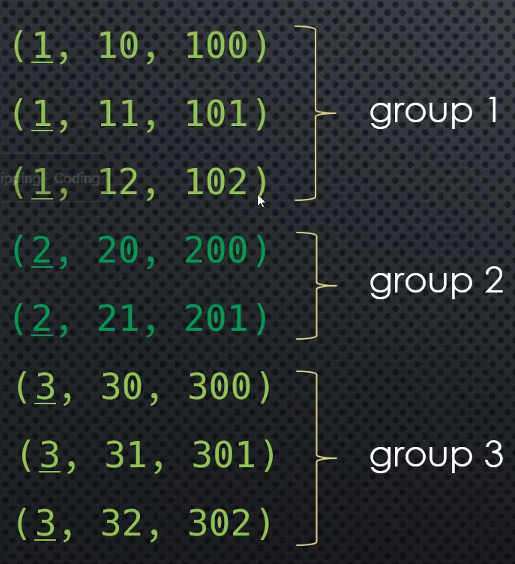

itertools.groupby(data, \[keyfunc]):
- returns a lazy iterator of tuples (key, sub_iterator).
- allows us to group iterables by specifying keyfunc which calculates the key we want to use for grouping.

In [1]:
import itertools

help(itertools.groupby)

Help on class groupby in module itertools:

class groupby(builtins.object)
 |  groupby(iterable, key=None)
 |  
 |  make an iterator that returns consecutive keys and groups from the iterable
 |  
 |  iterable
 |    Elements to divide into groups according to the key function.
 |  key
 |    A function for computing the group category for each element.
 |    If the key function is not specified or is None, the element itself
 |    is used for grouping.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Cre

The sequence of elements produced from the "sub-iterators" are all produced from the <b>same</b> underlying iterator.

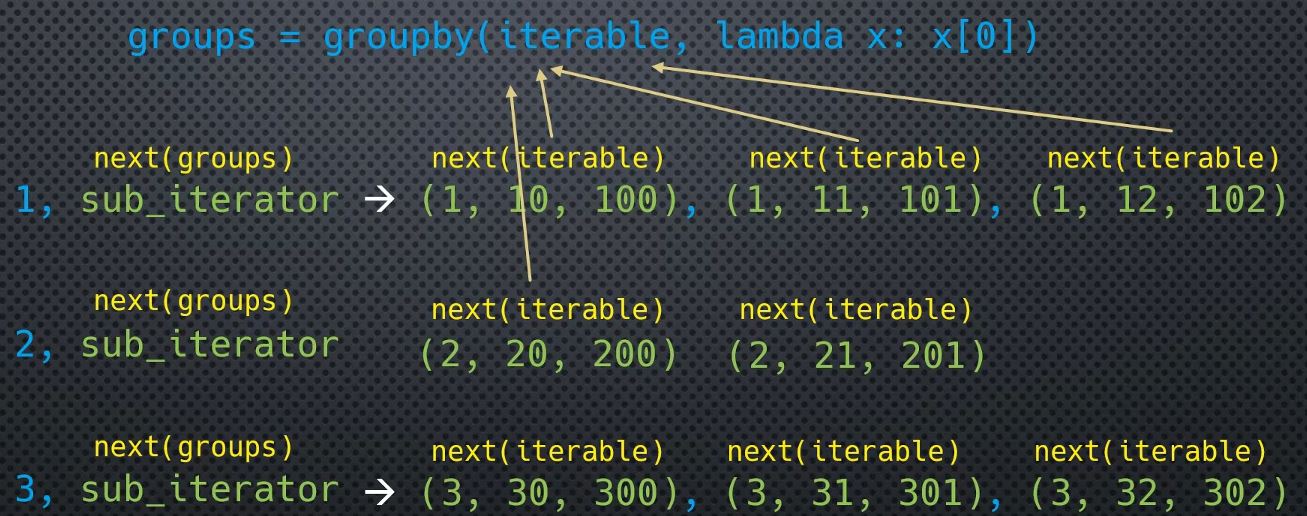

next(groups) actually iterates through all the elements of the current "sub-iterator" <b>before</b> proceeding to the next group.

In [4]:
data = 1, 2, 2, 2, 3, 1

In [6]:
import itertools

list(itertools.groupby(data)) # two groups of key 1 as the data was not sorted

[(1, <itertools._grouper at 0x26fd9ea5fc0>),
 (2, <itertools._grouper at 0x26fd9ea5690>),
 (3, <itertools._grouper at 0x26fd9ea5270>),
 (1, <itertools._grouper at 0x26fd9ea5930>)]

In [7]:
it = itertools.groupby(data)
for group in it:
    print(group[0], list(group[1]))

1 [1]
2 [2, 2, 2]
3 [3]
1 [1]


In [9]:
data = (
    (1, 'abc'),
    (1, 'bcd'),
    (2, 'pyt'),
    (2, 'yth'),
    (2, 'tho'),
    (3, 'hon')
)
data

((1, 'abc'), (1, 'bcd'), (2, 'pyt'), (2, 'yth'), (2, 'tho'), (3, 'hon'))

In [10]:
groups = itertools.groupby(data, key=lambda x: x[0])

In [11]:
list(groups)

[(1, <itertools._grouper at 0x26fd9ea50c0>),
 (2, <itertools._grouper at 0x26fd9ea6410>),
 (3, <itertools._grouper at 0x26fd9ea58d0>)]

In [12]:
list(groups)

[]

In [13]:
groups = itertools.groupby(data, key=lambda x: x[0])
for group_key, sub_iter in groups:
    print(group_key, list(sub_iter))

1 [(1, 'abc'), (1, 'bcd')]
2 [(2, 'pyt'), (2, 'yth'), (2, 'tho')]
3 [(3, 'hon')]


In [14]:
def gen_groups():
    for key in range(1, 4):
        for i in range(3):
            yield (key, i)

In [15]:
list(gen_groups())

[(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]

In [16]:
g = gen_groups()
groups = itertools.groupby(g, key=lambda x: x[0])

In [17]:
for group in groups:
    print(group[0], list(group[1]))

1 [(1, 0), (1, 1), (1, 2)]
2 [(2, 0), (2, 1), (2, 2)]
3 [(3, 0), (3, 1), (3, 2)]


In [18]:
list(g) # generator g is empty - exhausted

[]

In [19]:
list(groups) # same goes for groups

[]

In [21]:
with open('data/cars_2014.csv') as f:
    make_groups = itertools.groupby(f, lambda row: row.strip('\n').split(',')[0])

In [23]:
list(make_groups) # groupby is a lazy iterator, make_groups is referencing file f, which is now closed, so it cannot be iterated

ValueError: I/O operation on closed file.

In [24]:
with open('data/cars_2014.csv') as f:
    next(f) # skip headers
    make_groups = itertools.groupby(f, key=lambda row: row.strip('\n').split(',')[0])
    print(list(itertools.islice(make_groups, 5))) # printing only the first 5

[('ACURA', <itertools._grouper object at 0x0000026FDA7A4160>), ('ALFA ROMEO', <itertools._grouper object at 0x0000026FDB2F3D30>), ('APRILIA', <itertools._grouper object at 0x0000026FDB2F3DF0>), ('ARCTIC CAT', <itertools._grouper object at 0x0000026FDB2F3F10>), ('ARGO', <itertools._grouper object at 0x0000026FDB2F3F70>)]


In [26]:
with open('data/cars_2014.csv') as f:
    next(f) # skip headers
    make_groups = itertools.groupby(f, key=lambda row: row.strip('\n').split(',')[0])
    make_counts = ((key, len(models)) for key, models in make_groups) # iterators do not have to have __len__ method implemented
    print(list(make_counts))

TypeError: object of type 'itertools._grouper' has no len()

In [29]:
with open('data/cars_2014.csv') as f:
    next(f) # skip headers
    make_groups = itertools.groupby(f, key=lambda row: row.strip('\n').split(',')[0])
    make_counts = ((key, sum(1 for i in models))
                   for key, models in make_groups) 
    print(list(make_counts))

[('ACURA', 6), ('ALFA ROMEO', 2), ('APRILIA', 4), ('ARCTIC CAT', 96), ('ARGO', 4), ('ASTON MARTIN', 5), ('AUDI', 27), ('BENTLEY', 2), ('BLUE BIRD', 1), ('BMW', 86), ('BUGATTI', 1), ('BUICK', 5), ('CADILLAC', 7), ('CAN-AM', 61), ('CHEVROLET', 33), ('CHRYSLER', 2), ('DODGE', 7), ('DUCATI', 4), ('FERRARI', 6), ('FIAT', 2), ('FORD', 34), ('FREIGHTLINER', 7), ('GMC', 12), ('HARLEY DAVIDSON', 29), ('HINO', 7), ('HONDA', 91), ('HUSABERG', 4), ('HUSQVARNA', 9), ('HYUNDAI', 13), ('INDIAN', 3), ('INFINITI', 8), ('JAGUAR', 9), ('JEEP', 5), ('JOHN DEERE', 19), ('KAWASAKI', 59), ('KENWORTH', 11), ('KIA', 10), ('KTM', 13), ('KUBOTA', 4), ('KYMCO', 28), ('LAMBORGHINI', 2), ('LAND ROVER', 6), ('LEXUS', 14), ('LINCOLN', 6), ('LOTUS', 1), ('MACK', 9), ('MASERATI', 3), ('MAZDA', 5), ('MCLAREN', 2), ('MERCEDES-BENZ', 60), ('MINI', 3), ('MITSUBISHI', 8), ('NISSAN', 24), ('PEUGEOT', 3), ('POLARIS', 101), ('PORSCHE', 4), ('RAM', 6), ('RENAULT', 4), ('ROLLS ROYCE', 3), ('SCION', 5), ('SEAT', 3), ('SKI-DOO', 6

## Combinatorics

The itertool module contains a few functions for generating permutations and combinations. It also has a function to generate the Cartesian product of multiple iterables. All these functions return lazy iterators.

itertools.product(*args):
- returns a lazy iterator,
- can handle multiple iterables.

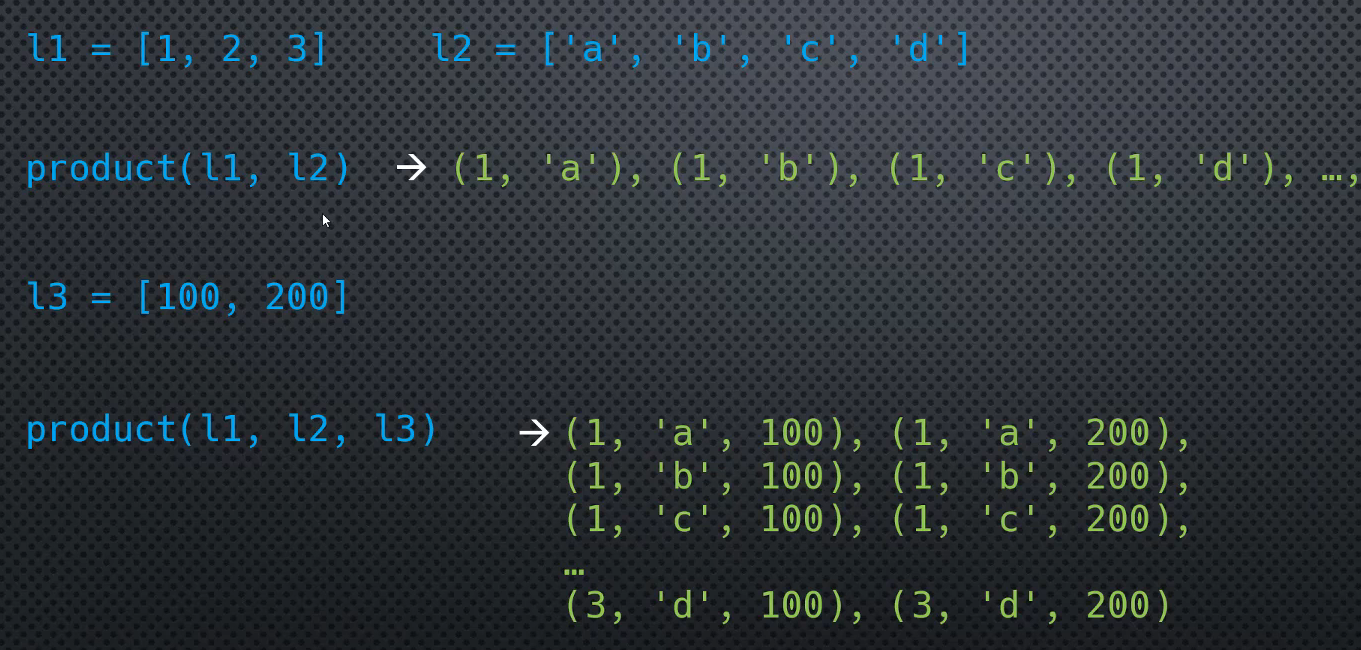

In [1]:
import itertools

l1 = ['x1', 'x2', 'x3', 'x4']
l2 = ['y1', 'y2', 'y3']
list(itertools.product(l1, l2))

[('x1', 'y1'),
 ('x1', 'y2'),
 ('x1', 'y3'),
 ('x2', 'y1'),
 ('x2', 'y2'),
 ('x2', 'y3'),
 ('x3', 'y1'),
 ('x3', 'y2'),
 ('x3', 'y3'),
 ('x4', 'y1'),
 ('x4', 'y2'),
 ('x4', 'y3')]

In [3]:
l3 = 'z1', 'z2'
list(itertools.product(l1, l2, l3))

[('x1', 'y1', 'z1'),
 ('x1', 'y1', 'z2'),
 ('x1', 'y2', 'z1'),
 ('x1', 'y2', 'z2'),
 ('x1', 'y3', 'z1'),
 ('x1', 'y3', 'z2'),
 ('x2', 'y1', 'z1'),
 ('x2', 'y1', 'z2'),
 ('x2', 'y2', 'z1'),
 ('x2', 'y2', 'z2'),
 ('x2', 'y3', 'z1'),
 ('x2', 'y3', 'z2'),
 ('x3', 'y1', 'z1'),
 ('x3', 'y1', 'z2'),
 ('x3', 'y2', 'z1'),
 ('x3', 'y2', 'z2'),
 ('x3', 'y3', 'z1'),
 ('x3', 'y3', 'z2'),
 ('x4', 'y1', 'z1'),
 ('x4', 'y1', 'z2'),
 ('x4', 'y2', 'z1'),
 ('x4', 'y2', 'z2'),
 ('x4', 'y3', 'z1'),
 ('x4', 'y3', 'z2')]

In [13]:
def grid(min_val, max_val, step, /, *, num_dimensions=2):
    axis = itertools.takewhile(lambda x: x <= max_val, 
                               itertools.count(min_val, step))
    axes = itertools.tee(axis, num_dimensions)
    return itertools.product(*axes)

In [14]:
list(grid(-1, 1, 0.5))

[(-1, -1),
 (-1, -0.5),
 (-1, 0.0),
 (-1, 0.5),
 (-1, 1.0),
 (-0.5, -1),
 (-0.5, -0.5),
 (-0.5, 0.0),
 (-0.5, 0.5),
 (-0.5, 1.0),
 (0.0, -1),
 (0.0, -0.5),
 (0.0, 0.0),
 (0.0, 0.5),
 (0.0, 1.0),
 (0.5, -1),
 (0.5, -0.5),
 (0.5, 0.0),
 (0.5, 0.5),
 (0.5, 1.0),
 (1.0, -1),
 (1.0, -0.5),
 (1.0, 0.0),
 (1.0, 0.5),
 (1.0, 1.0)]

In [16]:
list(grid(-1, 1, 1, num_dimensions=3))

[(-1, -1, -1),
 (-1, -1, 0),
 (-1, -1, 1),
 (-1, 0, -1),
 (-1, 0, 0),
 (-1, 0, 1),
 (-1, 1, -1),
 (-1, 1, 0),
 (-1, 1, 1),
 (0, -1, -1),
 (0, -1, 0),
 (0, -1, 1),
 (0, 0, -1),
 (0, 0, 0),
 (0, 0, 1),
 (0, 1, -1),
 (0, 1, 0),
 (0, 1, 1),
 (1, -1, -1),
 (1, -1, 0),
 (1, -1, 1),
 (1, 0, -1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, -1),
 (1, 1, 0),
 (1, 1, 1)]

In [21]:
sample_space = list(itertools.product(range(1, 7), range(1, 7)))
sample_space[:9]

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3)]

In [22]:
outcomes = list(filter(lambda x: sum(x) == 8, sample_space))
outcomes

[(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)]

In [23]:
len(outcomes)

5

In [27]:
len(outcomes) / len(sample_space)  # P(sum = 8) when rolling two dice

0.1388888888888889

itertools.permutations(iterable, r=None):
- will produce all the possible permutations of a given iterable,
- r is the size of the permutation,
- r = None means length of each permutation is the length of the iterable,
- elements of the iterable are considered unique based on their <b>position</b>, not their value,
- if the iterable produces repeat values then permutations will have repeat values too.

In [1]:
import itertools

help(itertools.permutations)

Help on class permutations in module itertools:

class permutations(builtins.object)
 |  permutations(iterable, r=None)
 |  
 |  Return successive r-length permutations of elements in the iterable.
 |  
 |  permutations(range(3), 2) --> (0,1), (0,2), (1,0), (1,2), (2,0), (2,1)
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [2]:
l1 = 'abc'
list(itertools.permutations(l1)) # if r is not provided, length of the iterable is taken

[('a', 'b', 'c'),
 ('a', 'c', 'b'),
 ('b', 'a', 'c'),
 ('b', 'c', 'a'),
 ('c', 'a', 'b'),
 ('c', 'b', 'a')]

In [4]:
list(itertools.permutations(l1, r=2))

[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]

In [7]:
l1 = 'abca'
list(itertools.permutations(l1, r=2)) # in terms of permutations the first and the last a are different things, thus we get ('a', 'a') two times

[('a', 'b'),
 ('a', 'c'),
 ('a', 'a'),
 ('b', 'a'),
 ('b', 'c'),
 ('b', 'a'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'a'),
 ('a', 'a'),
 ('a', 'b'),
 ('a', 'c')]

itertools.combinations(iterable, r) / itertools.combinations_with_replacement(iterable, r):
- unlike permutations, the order of elements in a combination is considered, so it's okay to always sort the elements of a combination,
- combinations of length r, can be picked from a set with or without replacement,
- the elements of an iterable are unique based on their position, not their value (just like for permutations),
- the differenet combinations produced by these function are sorted based on the original ordering in the iterable.

In [30]:
import itertools

help(itertools.combinations)

Help on class combinations in module itertools:

class combinations(builtins.object)
 |  combinations(iterable, r)
 |  
 |  Return successive r-length combinations of elements in the iterable.
 |  
 |  combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [8]:
list(itertools.combinations([1, 2, 3, 4], r=2))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [9]:
list(itertools.combinations([4, 3, 2, 1], r=2))

[(4, 3), (4, 2), (4, 1), (3, 2), (3, 1), (2, 1)]

In [31]:
help(itertools.combinations_with_replacement)

Help on class combinations_with_replacement in module itertools:

class combinations_with_replacement(builtins.object)
 |  combinations_with_replacement(iterable, r)
 |  
 |  Return successive r-length combinations of elements in the iterable allowing individual elements to have successive repeats.
 |  
 |  combinations_with_replacement('ABC', 2) --> ('A','A'), ('A','B'), ('A','C'), ('B','B'), ('B','C'), ('C','C')
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) f

In [10]:
list(itertools.combinations_with_replacement([1, 2, 3, 4], r=2))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)]

In [11]:
# what are the chances of pulling 4 consecutive aces from a deck of 52 cards
SUITS = 'SHDC'
RANKS = tuple(map(str, range(2, 11))) + tuple('JQKA')

In [15]:
from collections import namedtuple

Card = namedtuple('Card', 'rank suit')

In [16]:
deck = [Card(rank, suit) for rank, suit in itertools.product(RANKS, SUITS)]
deck[:5]

[Card(rank='2', suit='S'),
 Card(rank='2', suit='H'),
 Card(rank='2', suit='D'),
 Card(rank='2', suit='C'),
 Card(rank='3', suit='S')]

In [19]:
deck = (Card(rank, suit) for rank, suit in itertools.product(RANKS, SUITS))
sample_space = itertools.combinations(deck, r=4) # we haven't iterated through anything yet
total = 0
acceptable = 0
for outcome in sample_space:
    total += 1
    if all(map(lambda x: x.rank == 'A', outcome)):
        acceptable += 1

In [20]:
acceptable / total

3.6937852063902484e-06

## Project

Four data files are given: personal_info.csv, vehicle.csv, employment.csv, update_status.csv.<br>
Each file contains a common key that uniquely identifies each row - SSN.<br>
It's guaranteed that every SSN number:
- appears only once in every file,
- is present in all 4 files,
- the order of SSN in each file is the same.

### Goal
Create (lazy) iterator for each of the four files:
- returns named tuples,
- data types are appropriate,
- the 4 iterators are independent for each other (for now)

Use the <b>csv</b> module.

In [5]:
from datetime import datetime


def parse_field(field: str):    
    try:
        return int(field)
    except ValueError:
        pass

    try:
        return float(field)
    except ValueError:
        pass

    try:
        return datetime.strptime(field, "%Y-%m-%dT%H:%M:%SZ")
    except ValueError:
        return field
        

In [25]:
def iter_file(file, class_name):
    with open(file, newline='', encoding='utf-8') as f:
        csv_reader = csv.reader(f)
        headers = next(csv_reader)
        class_name = namedtuple(class_name, headers)

        for row in csv_reader:
            yield class_name(*[parse_field(field) for field in row])

In [32]:
gen = iter_file('data/vehicles.csv', 'Vehicle')
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

gen = iter_file('data/update_status.csv', 'Status')
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

Vehicle(ssn='100-53-9824', vehicle_make='Oldsmobile', vehicle_model='Bravada', model_year=1993)
Vehicle(ssn='101-71-4702', vehicle_make='Ford', vehicle_model='Mustang', model_year=1997)
Vehicle(ssn='101-84-0356', vehicle_make='GMC', vehicle_model='Yukon', model_year=2005)
Vehicle(ssn='104-22-0928', vehicle_make='Oldsmobile', vehicle_model='Intrigue', model_year=2000)
Status(ssn='100-53-9824', last_updated=datetime.datetime(2017, 10, 7, 0, 14, 42), created=datetime.datetime(2016, 1, 24, 21, 19, 30))
Status(ssn='101-71-4702', last_updated=datetime.datetime(2017, 1, 23, 11, 23, 17), created=datetime.datetime(2016, 1, 27, 4, 32, 57))
Status(ssn='101-84-0356', last_updated=datetime.datetime(2017, 10, 4, 11, 21, 30), created=datetime.datetime(2016, 9, 21, 23, 4, 7))
Status(ssn='104-22-0928', last_updated=datetime.datetime(2017, 3, 28, 12, 38, 29), created=datetime.datetime(2016, 4, 15, 11, 37, 17))
